In [1]:
# Nico T. Solitana
# De La Salle University Manila

import pandas as pd 
import numpy as np 
from data_cleaner import *
from gensim_vectorizer import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from training_testing import *

In [2]:
# Load Dataset
data = pd.read_csv('Dataset\\twitter_gender_data_filtered.csv')
data.head()
download_necessary_functions()
data['merge'] = data['description'] + data['text']

In [3]:
# Converts tokens into vectors
def ConvertToTfIdfVector(df):
    tfidf_vec = TfidfVectorizer(analyzer=clean_text)
    xtfidf_fit = tfidf_vec.fit(df['merge'])
    xtfidf = xtfidf_fit.fit_transform(df['merge'])
    X = pd.DataFrame(xtfidf.toarray())
    return X

In [4]:
# Vectorize by not separating male and female
X = ConvertToTfIdfVector(data)
X_train, X_test, y_train, y_test = train_test_split(X, data['gender'], test_size=0.1)

In [8]:
# Vectorize male and female data separately
male = pd.DataFrame(data[data['gender']=='male'])
female = pd.DataFrame(data[data['gender']=='female'])
X = (ConvertToTfIdfVector(male)).append(ConvertToTfIdfVector(female))
X = X.fillna(0)
y = male.append(female)
X_train, X_test, y_train, y_test = train_test_split(X, y['gender'], test_size=0.1)


In [5]:
# LOGISTIC REGRESSION
# Model Building, Cross Validation and Prediction
SetTrainTest(X_train, X_test, y_train, y_test)
TrainTestModel(lambda: LogisticRegression(solver='lbfgs',max_iter=500))

# Check Model Performance
accuracy, cf_matrix, f1_score, precision, recall = GetModelPerformance()
print('Accuracy: {} FScore: {} Precision: {} Recall: {}'.format(accuracy, f1_score, precision, recall))


[0.98794374 0.98593436 0.9919571  0.98927614 0.98525469]
Accuracy: 0.988 FScore: 0.987 Precision: 0.985 Recall: 0.99


In [7]:
# RANDOM FOREST
# Model Building, Cross Validation and Prediction
SetTrainTest(X_train, X_test, y_train, y_test)
TrainTestModel(lambda: RandomForestClassifier(n_estimators=200, max_depth=80, n_jobs=-1))

# Check Model Performance
accuracy, cf_matrix, f1_score, precision, recall = GetModelPerformance()
print('Accuracy: {} FScore: {} Precision: {} Recall: {}'.format(accuracy, f1_score, precision, recall))


[0.98526457 0.9738781  0.98190349 0.980563   0.9772118 ]
Accuracy: 0.984 FScore: 0.984 Precision: 0.982 Recall: 0.985


In [9]:
# SVM
# Model Building, Cross Validation and Prediction
SetTrainTest(X_train, X_test, y_train, y_test)
TrainTestModel(lambda: LinearSVC(C = 0.1, random_state=0))

# Check Model Performance
accuracy, cf_matrix, f1_score, precision, recall = GetModelPerformance()
print('Accuracy: {} FScore: {} Precision: {} Recall: {}'.format(accuracy, f1_score, precision, recall))


[0.98861353 0.98459478 0.98927614 0.98994638 0.98324397]
Accuracy: 0.987 FScore: 0.986 Precision: 0.982 Recall: 0.99


In [6]:
# GRADIENT BOOST
# Model Building, Cross Validation and Prediction
SetTrainTest(X_train, X_test, y_train, y_test)
TrainTestModel(lambda: GradientBoostingClassifier(learning_rate=1, max_depth=10, random_state=0))

# Check Model Performance
accuracy, cf_matrix, f1_score, precision, recall = GetModelPerformance()
print('Accuracy: {} FScore: {} Precision: {} Recall: {}'.format(accuracy, f1_score, precision, recall))


[0.9564635  0.9470864  0.9577748  0.94235925 0.93766756]
Accuracy: 0.949 FScore: 0.948 Precision: 0.919 Recall: 0.98


[Text(33.0, 0.5, 'True'), Text(0.5, 15.0, 'Predicted')]

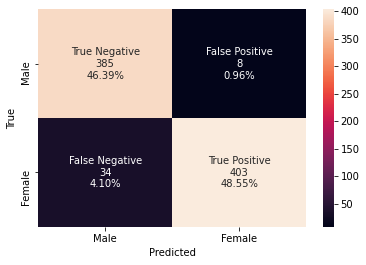

In [9]:
import seaborn as sns
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
categories = ['Male', 'Female']
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='')
ax.set_xticklabels(categories)
ax.set_yticklabels(categories)
ax.set(ylabel="True", xlabel="Predicted")